# Learning neural network for XOR 
>From scratch

- toc: true 
- badges: true
- comments: true
- author: Nipun Batra
- categories: [ML]

In [72]:
import autograd.numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.numpy_boxes.ArrayBox.__repr__ = lambda self: str(self._value)


In [73]:
X = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]
             ])

y = np.array([[0], [1], [1], [0]])

In [74]:
X.shape, y.shape

((4, 2), (4, 1))

In [75]:
N, N_0 = X.shape
N, N_2 = y.shape
N_1 = 2

In [76]:
W = [np.array([0]), np.array([[1, 1], [1, 1]]), np.array([[1, -2]])]

b = [np.array([0]), np.array([[0], [-1]]), np.array([[0]])]
B = []


In [77]:
A = [X]
A.extend([None]*(len(W)-1))
Z = [None]*(len(W))

In [78]:
def relu(z):
    temp = z.copy()
    temp[temp<0] = 0
    return temp

def sigmoid(z):
    return 1./(1+np.exp(-z))

In [79]:
for i in range(1, len(W)):
    Z[i] = A[i-1]@(W[i].T) + b[i].T
    A[i] =relu(Z[i])

In [80]:
A[2]==y

array([[ True],
       [ True],
       [ True],
       [ True]])

Excellent, now let us start from random weight initialisations and use backprop to come to our result

In [197]:
shapes = [X.shape[1], 2, 1]
activations = ['empty','sigmoid','sigmoid']

activation_func = {'sigmoid':sigmoid, 'relu':relu}


W = [None]*(len(shapes))
b = [None]*(len(shapes))

np.random.seed(0)
# Dummy
W[0] = np.array([0])
b[0] = np.array([0])

for i in range(1, len(shapes)):
    W[i] = np.random.randn(shapes[i], shapes[i-1])
    b[i] = np.random.randn(shapes[i], 1)
    
Z = [None]*(len(W))
Z[0] = np.array([0])

A = [X]
A.extend([None]*(len(W)-1))

In [198]:
def make_plot(iteration, loss, W, b, cmap='PRGn',close=True):
    h = 100
    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, h),
                             np.linspace(-0.1, 1.1, h))
    XX = np.c_[xx.ravel(), yy.ravel()]
    A = [XX]
    A.extend([None]*(len(W)-1))
    Z = [None]*(len(W))
    for i in range(1, len(W)):
        Z[i] = A[i-1]@(W[i].T) + b[i].T
        A[i] =sigmoid(Z[i])
    pred= A[2].reshape(xx.shape)
    pred[pred>0.5] = 1
    pred[pred<=0.5] = 0
    
    contours = plt.contourf(xx, yy, pred, h , cmap=cmap, alpha=0.2)
    plt.colorbar()
    plt.title(f"Iteration: {iteration}\n Loss: {loss}")
    plt.scatter(X[:, 0], X[:, 1], c= y.flatten(), cmap=cmap, s=200)
    plt.savefig(f"/home/nipunbatra-pc/Desktop/xor/{iteration:04}.png")
    if close:
        plt.clf()

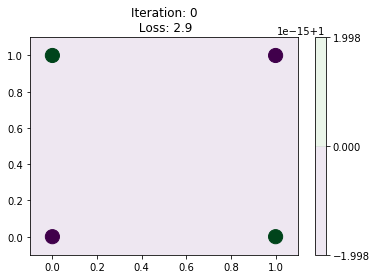

In [199]:
make_plot(0, 2.9, W, b, close=False)

In [133]:
def objective(W, b):
    for i in range(1, len(W)):
        Z[i] = A[i-1]@(W[i].T) + b[i].T
        A[i] = activation_func[activations[i]](Z[i])
    y_hat = A[2]
    loss = (-y.T@np.log(y_hat) - (1-y).T@np.log(1-y_hat)).squeeze()
    return loss

In [134]:
objective(W, b)

array(2.9991465)

In [135]:
from autograd import elementwise_grad as egrad
from autograd import grad

In [136]:
grad_objective = grad(objective, argnum=[0, 1])

In [137]:
(del_W0_auto, del_W1_auto, del_W2_auto), (del_b0_auto, del_b1_auto, del_b2_auto) =  grad_objective(W, b)

In [138]:
del_W2_auto

array([[0.60353799, 0.35399637]])

In [139]:
del_W2_ours = (A[2]-y).T@A[1]

In [140]:
del_W2_ours,del_W2_auto

([[0.60353799 0.35399637]], array([[0.60353799, 0.35399637]]))

In [141]:
del_b2_ours = (A[2]-y).sum(axis=0).reshape(-1, 1)

In [142]:
del_b2_ours,del_b2_auto

([[0.6632421]], array([[0.6632421]]))

In [144]:
del_A1_ours = (A[2]-y)@W[2]
del_Z1_ours  = np.multiply(del_A1_ours, sigmoid(Z[1])*(1-sigmoid(Z[1])))
del_W1_ours = del_Z1_ours.T@A[0]
np.allclose(del_W1_ours, del_W1_auto)

True

In [145]:
del_b1_ours = (del_Z1_ours.sum(axis=0)).reshape(-1, 1)
np.allclose(del_b1_ours, del_b1_auto)

True

In [201]:
epochs = 140
alpha =1
losses = np.zeros(epochs)

print_every = 20

W = [None]*(len(shapes))
b = [None]*(len(shapes))

np.random.seed(0)
# Dummy
W[0] = np.array([0])
b[0] = np.array([0])

for i in range(1, len(shapes)):
    W[i] = np.random.randn(shapes[i], shapes[i-1])
    b[i] = np.random.randn(shapes[i], 1)
    
Z = [None]*(len(W))
Z[0] = np.array([0])

A = [X]
A.extend([None]*(len(W)-1))

del_Z = [None]*(len(W)+1)
del_A = [None]*(len(W)+1)
del_W = [None]*(len(W))
del_b = [None]*(len(W))

for iteration in range(epochs):
    
    for i in range(1, len(W)):
        Z[i] = A[i-1]@(W[i].T) + b[i].T
        A[i] = activation_func[activations[i]](Z[i])

    y_hat = A[2]
    loss = (-y.T@np.log(y_hat) - (1-y).T@np.log(1-y_hat)).squeeze()
    losses[iteration] = loss
    if iteration%print_every==0:
        print(iteration, loss)
    
    make_plot(iteration, loss, W, b, close=True)
        
    del_A[2] = -np.multiply(y, A[2]) + np.multiply((1-y), (1-A[2]))
    del_Z[2] = A[2]-y
    del_W[2] = (A[2]-y).T@A[1]
    del_b[2] = (del_Z[2].sum(axis=0)).reshape(-1, 1)
    del_A[1] = del_Z[2]@W[2]
    del_Z[1]  = np.multiply(del_A[1], sigmoid(Z[1])*(1-sigmoid(Z[1])))
    del_W[1] = del_Z[1].T@A[0]
    del_b[1] = (del_Z[1].sum(axis=0)).reshape(-1, 1)
    
    for i in range(1, len(shapes)):
        W[i] = W[i] - alpha*del_W[i]
        b[i] = b[i] - alpha*del_b[i]

0 2.9991464995409807
20 2.850067543754094
40 2.5045921819726082
60 1.5756597251036364
80 0.5779054501565161
100 0.3097308274202594
120 0.2028529568023768


<Figure size 432x288 with 0 Axes>

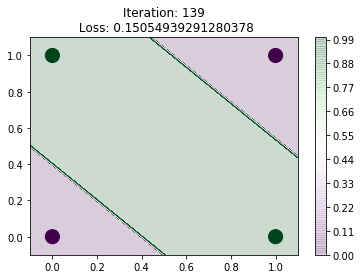

In [203]:
make_plot(iteration, loss, W, b, close=False)

In [121]:
make_plot(0, 2.9, W, b, close=False)

array([[0],
       [1],
       [1],
       [0]])

In [204]:
!convert -delay 20 -loop 0 /home/nipunbatra-pc/Desktop/xor/*.png xor-own.gif

![](xor-own.gif)